<a href="https://colab.research.google.com/github/alifele/Sklearn/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this notebook I am going to show how to use Linear Regression function in ```sklearn```

In [0]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

#LinearRegression

##Generating Data 

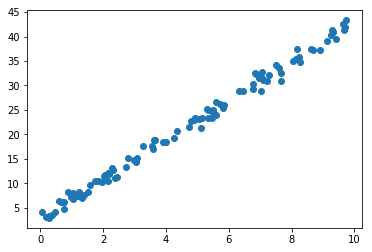

In [7]:
x = 10 * np.random.random((100,1))
y = 3 + 4 * x + np.random.randn(100,1)
plt.scatter(x,y)

##fiting the model

this function uses the *normal equation* to find the best fit to data. You can do it manually (see MachineLearning repository on my github. You can find the notebook at Machine_learning/MachineLearningBook/Normal equation.ipynb )

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('the coefficients are : {}'.format(lin_reg.coef_))
print('the intercetps are : {}'.format(lin_reg.intercept_))

the coefficients are : [[4.01556823]]
the intercetps are : [2.89102382]


In [0]:
y_pred = lin_reg.predict(x)
y_pred.shape

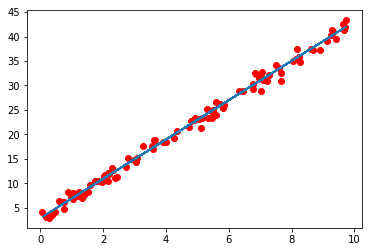

In [15]:
plt.scatter(x,y,c='r')
plt.plot(x,y_pred)

##What is going on?!
this function is based on ```scipy.linalg.lstsq()``` (the name stands for 'least squares')

In [0]:
from scipy.linalg import lstsq 
theta_best_svd, residuals, rank, s = lstsq()

for using this function directly you must add a bias column to the x

In [0]:
X = np.c_[x, np.ones((100,1))]
theta_best_svd, residuals, rank, s = lstsq(X,y)

In [20]:
print(theta_best_svd)

[[4.01556823]
 [2.89102382]]


### How this is possible
sklearn function computes $ \theta=X^{+}*y $, where $ X^{+}$ is pesudoinverse of $X$ (especialy the Moore-penrose inverse).

You can calculate this pesudoinverse directly with np.linalg.pinv

In [0]:
from numpy.linalg import pinv

In [24]:
pinv(X) @ y 

array([[4.01556823],
       [2.89102382]])

In [25]:
pinv(X).dot(y)

array([[4.01556823],
       [2.89102382]])